In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display, HTML # used to print out pretty pandas dataframes
import analysis_helper
display(HTML("<style>.container { width:100% !important; }</style>")) # widest display
import matplotlib.dates as dates
import matplotlib.lines as mlines
pd.options.display.max_colwidth = 1000
pd.options.display.width = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 3

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(13, 5)


%matplotlib inline
plt.style.use('ggplot') 

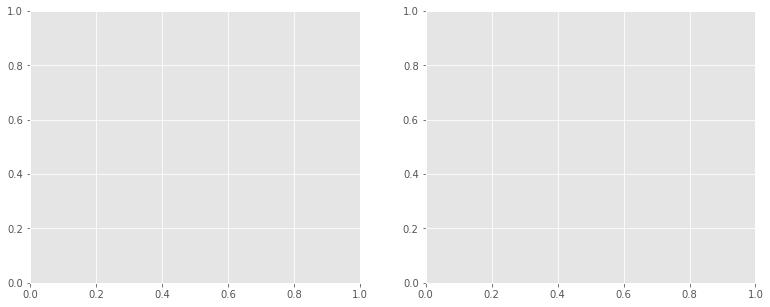

In [54]:
reload(analysis_helper)
import analysis_helper

In [67]:
data_path = 'phaseone_v0.csv'
data = analysis_helper.Data(pth=data_path)

adding days to primary outcomes...
splitting into opiate/nonopiate samples...


## Explore distributions
- Relative to primary outcomes of LOS in ICU and hospital
- Relative to secondary outcomes of mortality 30d, 1yr
- Look at plots
    - histogram
    - box plot
    - qq plot
- Descriptive statistics
    - mean
    - median
    - std dev
    - variance##
- Try out some tests
    - test for normality 
    - mann whitney u test
    - CI for MU tests

### ICU Length of Stay 

In [232]:
reload(analysis_helper)
import analysis_helper

			*** Info for: non_opiate group ***
 			--- Descriptive Stats --- 
 MEAN=3.93856693262 MEDIAN=2.11454861111 STD.DEV=5.66600214659 VARIANCE=5.66600214659

			***Info for: opiate group ***
 			--- Descriptive Stats --- 
 MEAN=4.24934680064 MEDIAN=2.2502662037 STD.DEV=5.84239499835 VARIANCE=5.84239499835

					{HISTOGRAMS}


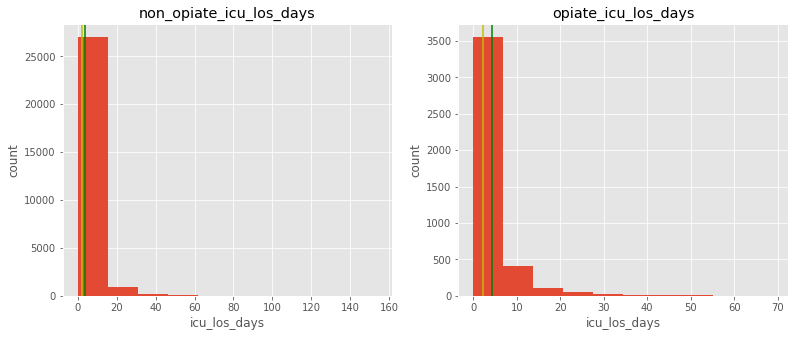

					{Q-Q PLOTS}


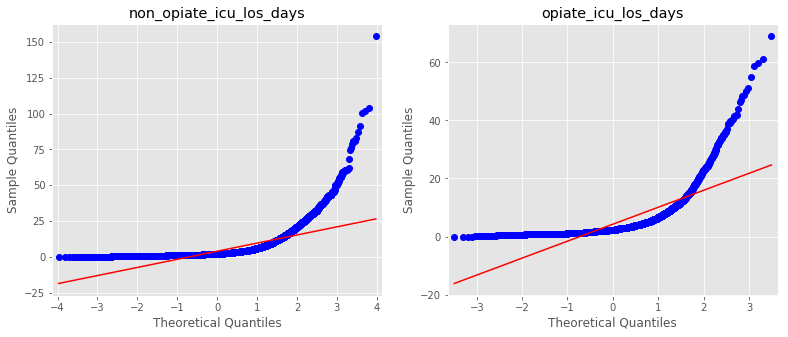


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (fail to reject H0)
Opiate samples
Pval=2.585137421238262e-231 less than alpha=0.050. Different distribution (fail to reject H0)

			{Mann Whitney U-test Comparing icu_los_days between opiate/non-opiate use on admission}
Statistics=62025559.5, p=0.000
Pval=3.901161328054533e-08 less than alpha=0.050. Different distribution (fail to reject H0)


In [233]:
analysis_helper.plot_hist(data, col='icu_los_days')
analysis_helper.plot_qq(data, col='icu_los_days')
analysis_helper.do_normality(data, col='icu_los_days')
analysis_helper.do_mannwhitney(data, col='icu_los_days')

### Hospital Length of Stay 

			*** Info for: non_opiate group ***
 			--- Descriptive Stats --- 
 MEAN=9.59530319149 MEDIAN=6.81597222221 STD.DEV=9.76284463208 VARIANCE=9.76284463208

			***Info for: opiate group ***
 			--- Descriptive Stats --- 
 MEAN=11.174929958 MEDIAN=7.85069444446 STD.DEV=11.0827498814 VARIANCE=11.0827498814

					{HISTOGRAMS}


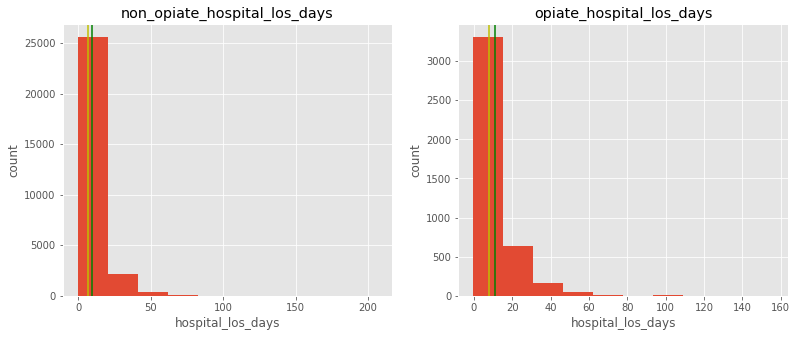

					{Q-Q PLOTS}


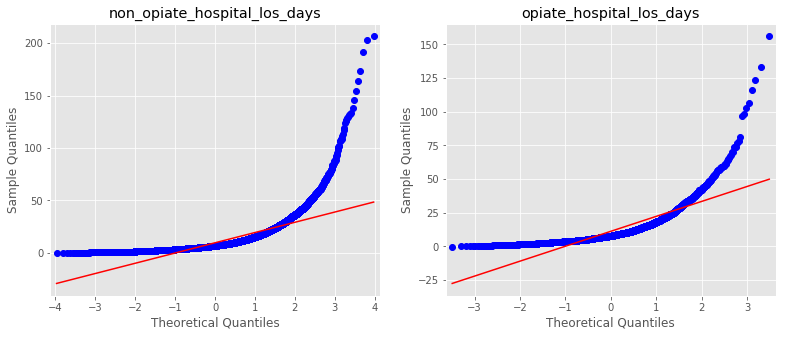


			{Kolmogorov-Smirnov Test for Normality}
Non opiate samples
Pval=0.0 less than alpha=0.050. Different distribution (fail to reject H0)
Opiate samples
Pval=2.1710649517675293e-114 less than alpha=0.050. Different distribution (fail to reject H0)

			{Mann Whitney U-test Comparing hospital_los_days between opiate/non-opiate use on admission}
Statistics=64847857.0, p=0.000
Pval=1.642559665836863e-25 less than alpha=0.050. Different distribution (fail to reject H0)


In [234]:
analysis_helper.plot_hist(data, col='hospital_los_days')
analysis_helper.plot_qq(data, col='hospital_los_days')
analysis_helper.do_normality(data, col='hospital_los_days')
analysis_helper.do_mannwhitney(data, col='hospital_los_days')

### 30 day mortality

			*** Info for: non_opiate group ***
 			--- Descriptive Stats --- 
 MEAN=0.0982624113475 MEDIAN=0.0 STD.DEV=0.297669128167 VARIANCE=0.297669128167

			***Info for: opiate group ***
 			--- Descriptive Stats --- 
 MEAN=0.134321223709 MEDIAN=0.0 STD.DEV=0.340997115194 VARIANCE=0.340997115194

					{HISTOGRAMS}


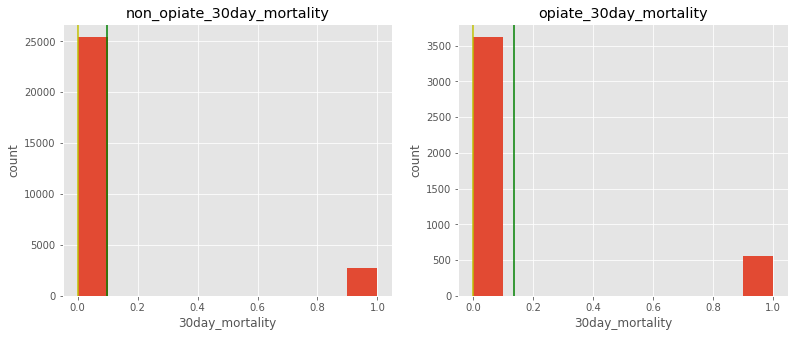

In [237]:
analysis_helper.plot_hist(data, col='30day_mortality')

### 1 year mortality

			*** Info for: non_opiate group ***
 			--- Descriptive Stats --- 
 MEAN=0.184078014184 MEDIAN=0.0 STD.DEV=0.387547802056 VARIANCE=0.387547802056

			***Info for: opiate group ***
 			--- Descriptive Stats --- 
 MEAN=0.262667304015 MEDIAN=0.0 STD.DEV=0.440083164205 VARIANCE=0.440083164205

					{HISTOGRAMS}


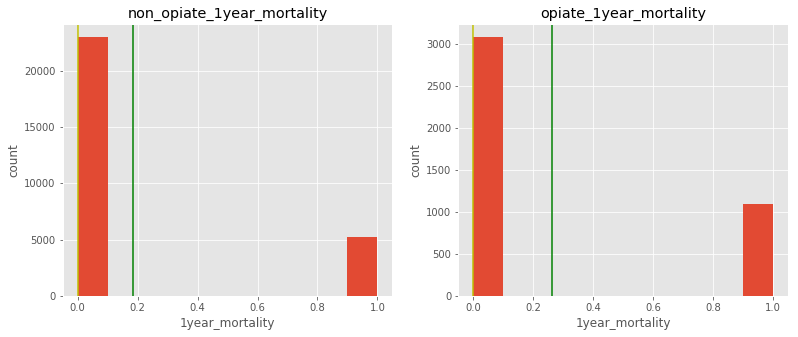

In [238]:
analysis_helper.plot_hist(data, col='1year_mortality')

In [249]:
non = data.non_opiates
num_non_yes = len(non.data[non.data['1year_mortality'] == 1])
num_non_no = len(non.data[non.data['1year_mortality'] == 0])

op = data.opiate
num_op_yes = len(op.data[op.data['1year_mortality'] == 1])
num_op_no = len(op.data[op.data['1year_mortality'] == 0])

In [256]:
pd.DataFrame.from_items([('Non-opiate', [num_non_yes, num_non_no]), ('opiate', [num_op_yes, num_op_no])], orient='index', columns=['Yes Mortality 1 yr', 'No Mortality 1 yr'])

/Users/anaelia/anaconda3/envs/opiate/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,Yes Mortality 1 yr,No Mortality 1 yr
Non-opiate,5191,23009
opiate,1099,3085
